# Handwritten Hangul Analysis

Notebook for analysis of the Handwritten Hangul Dataset (src: ) by Ethan Payne.

## Data Engineering & Processing

Please see `data_wrapper.py` for data handling.

In [1]:
from data_wrapper import DataWrapper

In [2]:
hh_data = DataWrapper(raw_data_path = "Data\RawData", output_path = "Data", rand_seed = 12345)

Dataframes:

In [3]:
hh_data.df.head()

,image_name,labels
0,ae_1_0.jpg,ae
1,ae_1_1.jpg,ae
2,ae_1_10.jpg,ae
3,ae_1_11.jpg,ae
4,ae_1_12.jpg,ae


In [4]:
hh_data.df.describe()

,image_name,labels
count,2400,2400
unique,2400,30
top,ae_1_0.jpg,ae
freq,1,80


In [5]:
hh_data.train_df.head()

,image_name,labels
0,d_35_13.jpg,d
1,yu_59_6.jpg,yu
2,eo_97_2.jpg,eo
3,yo_58_9.jpg,yo
4,g_99_8.jpg,g


In [6]:
hh_data.test_df.head()

,image_name,labels
0,h_11_15.jpg,h
1,g_39_19.jpg,g
2,eu_98_10.jpg,eu
3,r_20_17.jpg,r
4,eu_68_13.jpg,eu


In [7]:
hh_data.load_image("a_0_0.jpg")

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

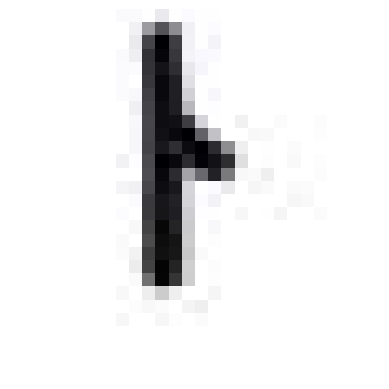

In [8]:
hh_data.plot_image("a_0_0.jpg")

Check shapes:

In [9]:
print("x_full: ", hh_data.x_full.shape)
print("y_full: ", hh_data.y_full.shape)
print("x_train: ", hh_data.x_train.shape)
print("y_train: ", hh_data.y_train.shape)
print("x_val: ", hh_data.x_val.shape)
print("y_val: ", hh_data.y_val.shape)
print("x_test: ", hh_data.x_test.shape)
print("y_test: ", hh_data.y_test.shape)

x_full:  (2400, 28, 28, 3)
y_full:  (2400,)
x_train:  (1920, 28, 28, 3)
y_train:  (1920,)
x_val:  (240, 28, 28, 3)
y_val:  (240,)
x_test:  (240, 28, 28, 3)
y_test:  (240,)


## MiniVGG Architecture

### Model Training - MiniVGG

Please see the `models.py` module for MiniVGG implementation.

In [10]:
from models import MiniVGG
from keras import optimizers

In [11]:
mini_vgg = MiniVGG(input_shape=(28, 28, 3), num_labels=30)
mini_vgg.build()
mini_vgg.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [12]:
opt = optimizers.Adam(learning_rate=0.001)
mini_vgg.model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = mini_vgg.model.fit(hh_data.x_train, hh_data.y_train, epochs=10, validation_data=(hh_data.x_val, hh_data.y_val))

Epoch 1/10
60/60 [==============================] - 7s 88ms/step - loss: 1.6481 - accuracy: 0.5479 - val_loss: 0.7489 - val_accuracy: 0.7583
Epoch 2/10
60/60 [==============================] - 4s 73ms/step - loss: 0.5127 - accuracy: 0.8328 - val_loss: 0.2645 - val_accuracy: 0.9250
Epoch 3/10
60/60 [==============================] - 4s 70ms/step - loss: 0.2546 - accuracy: 0.9229 - val_loss: 0.1669 - val_accuracy: 0.9542
Epoch 4/10
60/60 [==============================] - 4s 71ms/step - loss: 0.1965 - accuracy: 0.9427 - val_loss: 0.1213 - val_accuracy: 0.9542
Epoch 5/10
60/60 [==============================] - 4s 70ms/step - loss: 0.1241 - accuracy: 0.9667 - val_loss: 0.0843 - val_accuracy: 0.9792
Epoch 6/10
60/60 [==============================] - 5s 79ms/step - loss: 0.0997 - accuracy: 0.9734 - val_loss: 0.1108 - val_accuracy: 0.9542
Epoch 7/10
60/60 [==============================] - 5s 79ms/step - loss: 0.0779 - accuracy: 0.9776 - val_loss: 0.0739 - val_accuracy: 0.9750
Epoch 8/10
60

In [13]:
test_loss, test_acc = mini_vgg.model.evaluate(hh_data.x_test,  hh_data.y_test, verbose=1)
print("Test acc is {}".format(test_acc))

8/8 [==============================] - 0s 25ms/step - loss: 0.0509 - accuracy: 0.9917
Test acc is 0.9916666746139526


In [14]:
mini_vgg.save_model()

### Architecture Analysis - MiniVGG

In [ ]:
mini_vgg = MiniVGG(input_shape=(28, 28, 3), num_labels=30)
mini_vgg.load_model("Models\\MiniVGG\\10.03.2024_120948_MiniVGG.keras")